In [1]:
!pip install geopandas

     |████████████████████████████████| 931kB 27.8MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 43.1MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 16.8MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 25.1MB/s eta 0:00:01


In [3]:
!conda install -c conda-forge folium
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import requests
import folium
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.10.1              |             py_0          59 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTAL

DATA PREPARATION

In [4]:

#Import Data
df = pd.read_html('https://es.wikipedia.org/wiki/Anexo:Barrios_de_la_ciudad_de_Buenos_Aires')[0]
#Rename columns
df.columns = ['Barrio','Superficie','Habitantes','Densidad','Comuna']
#Modify strings for later join
df['Barrio'] = df['Barrio'].str.upper()
df.head()

,Barrio,Superficie,Habitantes,Densidad,Comuna
0,AGRONOMÍA,"2,1 km²",34.580,8.645,Comuna 15
1,ALMAGRO,"4,1 km²",139.262,33.960,Comuna 5
2,BALVANERA,"4,4 km²",152.198,34.950,Comuna 3
3,BARRACAS,"7,6 km²",77.474,10.194,Comuna 4
4,BELGRANO,"6,8 km²",138.942,20.433,Comuna 13


LATITUDE AND LONGITUDE

In [5]:
#Import Data
url = "http://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson"
zones = gpd.read_file(url)
#Get centroids for each neighborhood as new columns
for i in range(0,len(zones)):
    zones.loc[i,'centroid_lon'] = zones.geometry.centroid.x.iloc[i]
    zones.loc[i,'centroid_lat'] = zones.geometry.centroid.y.iloc[i]

In [6]:
zones.head()

,barrio,comuna,perimetro,area,geometry,centroid_lon,centroid_lat
0,CHACARITA,15,7724.852955,3.115707e+06,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5...",-58.454180,-34.588369
1,PATERNAL,15,7087.513295,2.229829e+06,"POLYGON ((-58.46558 -34.59656, -58.46562 -34.5...",-58.468665,-34.597421
2,VILLA CRESPO,15,8131.857075,3.615978e+06,"POLYGON ((-58.42375 -34.59783, -58.42495 -34.5...",-58.442725,-34.598830
3,VILLA DEL PARQUE,11,7705.389797,3.399596e+06,"POLYGON ((-58.49461 -34.61487, -58.49479 -34.6...",-58.490677,-34.604247
4,ALMAGRO,5,8537.901368,4.050752e+06,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6...",-58.421745,-34.609227


In [7]:
# Join neighborhood data
df_coor = df.merge(zones,how="inner", left_on="Barrio",right_on="barrio",left_index=True)
df_coor

,Barrio,Superficie,Habitantes,Densidad,Comuna,barrio,comuna,perimetro,area,geometry,centroid_lon,centroid_lat
4,ALMAGRO,"4,1 km²",139.262,33.960,Comuna 5,ALMAGRO,5,8537.901368,4.050752e+06,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6...",-58.421745,-34.609227
24,BALVANERA,"4,4 km²",152.198,34.950,Comuna 3,BALVANERA,3,8375.821811,4.342280e+06,"POLYGON ((-58.41192 -34.59800, -58.41029 -34.5...",-58.403062,-34.609099
29,BARRACAS,"7,6 km²",77.474,10.194,Comuna 4,BARRACAS,4,12789.791771,7.953453e+06,"POLYGON ((-58.37034 -34.63293, -58.37028 -34.6...",-58.384272,-34.646403
43,BELGRANO,"6,8 km²",138.942,20.433,Comuna 13,BELGRANO,13,20609.775397,7.999240e+06,"POLYGON ((-58.45057 -34.53561, -58.45066 -34.5...",-58.450241,-34.554763
13,BOEDO,"2,6 km²",48.520,18.662,Comuna 5,BOEDO,5,6602.510266,2.609851e+06,"POLYGON ((-58.41178 -34.63036, -58.41178 -34.6...",-58.418840,-34.629960
5,CABALLITO,"6,8 km²",183.396,25.830,Comuna 6,CABALLITO,6,10990.964471,6.851029e+06,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6...",-58.443603,-34.616825
0,CHACARITA,"3,1 km²",27.440,9.800,Comuna 15,CHACARITA,15,7724.852955,3.115707e+06,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5...",-58.454180,-34.588369
21,COGHLAN,"1,3 km²",19.177,14.752,Comuna 12,COGHLAN,12,4627.563131,1.279951e+06,"POLYGON ((-58.47242 -34.56610, -58.47296 -34.5...",-58.474944,-34.560624
23,COLEGIALES,"2,3 km²",56.998,21.922,Comuna 13,COLEGIALES,13,6374.619045,2.289774e+06,"POLYGON ((-58.44669 -34.56907, -58.44650 -34.5...",-58.450968,-34.574642
9,FLORES,"7,8 km²",150.484,18.578,Comuna 7,FLORES,7,15772.439510,8.590784e+06,"POLYGON ((-58.46041 -34.65680, -58.46090 -34.6...",-58.458268,-34.636803


In [8]:
df_coor.columns

Index(['Barrio', 'Superficie', 'Habitantes', 'Densidad', 'Comuna', 'barrio',
       'comuna', 'perimetro', 'area', 'geometry', 'centroid_lon',
       'centroid_lat'],
      dtype='object')

In [9]:
# Filter extra columns
df = df_coor[['Barrio', 'Superficie', 'Habitantes', 'Densidad', 'centroid_lon', 'centroid_lat', 'comuna']].copy()
df.head()

,Barrio,Superficie,Habitantes,Densidad,centroid_lon,centroid_lat,comuna
4,ALMAGRO,"4,1 km²",139.262,33.960,-58.421745,-34.609227,5
24,BALVANERA,"4,4 km²",152.198,34.950,-58.403062,-34.609099,3
29,BARRACAS,"7,6 km²",77.474,10.194,-58.384272,-34.646403,4
43,BELGRANO,"6,8 km²",138.942,20.433,-58.450241,-34.554763,13
13,BOEDO,"2,6 km²",48.520,18.662,-58.418840,-34.629960,5


In [10]:
# Convert String to Float
df.Superficie = df.Superficie.str.split(" ", n = 1, expand = True)[0].str.replace(",",".").astype(float)

In [11]:
# Import Income Data
url2 = 'https://www.estadisticaciudad.gob.ar/eyc/wp-content/uploads/2018/05/MT_eah_2217.xlsx'
ing = pd.read_excel(url2,sheet_name=2,skiprows=2)
ing.columns = ['comuna','Ingreso']
ing.head(2)

,comuna,Ingreso
0,1,35861.0
1,2,38787.0


In [12]:
#Add Income to each neighborhood based on "comuna" (Borough)
df = df.merge(ing,on='comuna')
df.head(3)

,Barrio,Superficie,Habitantes,Densidad,centroid_lon,centroid_lat,comuna,Ingreso
0,ALMAGRO,4.1,139.262,33.960,-58.421745,-34.609227,5,32390.0
1,BOEDO,2.6,48.520,18.662,-58.418840,-34.629960,5,32390.0
2,BALVANERA,4.4,152.198,34.950,-58.403062,-34.609099,3,27847.0


In [14]:
CLIENT_ID = 'EP5NZB3MIJNHM3RPM3KE5M5SGVH2Y2YJ120PWSM3IJM4L13F' # Foursquare ID
CLIENT_SECRET = 'PZZNUSRL3XGJEKYR3OBZCFPVZBL3YYSF2SYGMPDQH0KRXJYR' # Foursquare Secret
VERSION = '20180605' # API version
LIMIT = 200
radius = 2000

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT
            )
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:

bsas_venues = getNearbyVenues(names=df_coor['Barrio'],
                                   latitudes=df_coor['centroid_lat'],
                                   longitudes=df_coor['centroid_lon'])

ALMAGRO
BALVANERA
BARRACAS
BELGRANO
BOEDO
CABALLITO
CHACARITA
COGHLAN
COLEGIALES
FLORES
FLORESTA
LINIERS
MATADEROS
MONTE CASTRO
NUEVA POMPEYA
PALERMO
PARQUE AVELLANEDA
PARQUE CHACABUCO
PARQUE CHAS
PARQUE PATRICIOS
PUERTO MADERO
RECOLETA
RETIRO
SAAVEDRA
SAN TELMO
VERSALLES
VILLA CRESPO
VILLA DEL PARQUE
VILLA DEVOTO
VILLA GRAL. MITRE
VILLA LUGANO
VILLA LURO
VILLA REAL
VILLA RIACHUELO
VILLA SANTA RITA
VILLA SOLDATI
VILLA URQUIZA


In [17]:
bsas_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ALMAGRO,-34.609227,-58.421745,Las Violetas,-34.611275,-58.421057,Coffee Shop
1,ALMAGRO,-34.609227,-58.421745,El Baquiano - Fiambrería,-34.610395,-58.421248,Gourmet Shop
2,ALMAGRO,-34.609227,-58.421745,El Boliche de Roberto,-34.606932,-58.418659,Bar
3,ALMAGRO,-34.609227,-58.421745,La Catedral,-34.604958,-58.421683,Performing Arts Venue
4,ALMAGRO,-34.609227,-58.421745,El Patio de Mingo,-34.609927,-58.422652,Argentinian Restaurant


In [18]:
#Top 10 Venues Categories
bsas_venues['Venue Category'].value_counts()[:10]

Café                      62
Argentinian Restaurant    55
Pizza Place               52
Ice Cream Shop            40
Bakery                    33
Plaza                     30
Coffee Shop               29
BBQ Joint                 21
Restaurant                20
Bar                       18
Name: Venue Category, dtype: int64

In [19]:

#Number of venues per Neighborhood
ven_barrio = bsas_venues.groupby('Neighborhood').count()['Venue'].reset_index()
ven_barrio

,Neighborhood,Venue
0,ALMAGRO,42
1,BALVANERA,17
2,BARRACAS,3
3,BELGRANO,100
4,BOEDO,17
5,CABALLITO,39
6,CHACARITA,23
7,COGHLAN,12
8,COLEGIALES,39
9,FLORES,9


ANALYZE EACH NEIGHBORHOOD

In [20]:
# one hot encoding
bsas_onehot = pd.get_dummies(bsas_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bsas_onehot['Neighborhood'] = bsas_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bsas_onehot.columns[-1]] + list(bsas_onehot.columns[:-1])
bsas_onehot = bsas_onehot[fixed_columns]

bsas_onehot.head()

,Wine Shop,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Toy / Game Store,Track,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Vietnamese Restaurant,Whisky Bar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
bsas_grouped = bsas_onehot.groupby('Neighborhood').mean().reset_index()
bsas_grouped

,Neighborhood,Wine Shop,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Toy / Game Store,Track,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Vietnamese Restaurant,Whisky Bar
0,ALMAGRO,0.000000,0.000000,0.000000,0.119048,0.00,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000
1,BALVANERA,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.058824,0.00,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000
2,BARRACAS,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000
3,BELGRANO,0.000000,0.000000,0.000000,0.030000,0.00,0.000000,0.000000,0.05,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.00,0.000000
4,BOEDO,0.000000,0.000000,0.000000,0.294118,0.00,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000
5,CABALLITO,0.000000,0.000000,0.000000,0.051282,0.00,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00,0.025641,0.000000,0.000000,0.00,0.000000
6,CHACARITA,0.000000,0.000000,0.000000,0.086957,0.00,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.043478,0.000000,0.00,0.043478
7,COGHLAN,0.000000,0.000000,0.000000,0.166667,0.00,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000
8,COLEGIALES,0.000000,0.000000,0.000000,0.076923,0.00,0.000000,0.000000,0.00,0.025641,...,0.000000,0.00000,0.000000,0.025641,0.00,0.000000,0.000000,0.000000,0.00,0.000000
9,FLORES,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.111111,...,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000


In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [24]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bsas_grouped['Neighborhood']

for ind in np.arange(bsas_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bsas_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALMAGRO,Argentinian Restaurant,Pizza Place,Ice Cream Shop,Bar,Bakery,Café,Cheese Shop,Italian Restaurant,Indie Theater,Mexican Restaurant
1,BALVANERA,Fast Food Restaurant,Café,Electronics Store,BBQ Joint,Food,Metro Station,Gas Station,Bus Stop,Gym / Fitness Center,Hotel
2,BARRACAS,Grocery Store,Speakeasy,Farmers Market,Whisky Bar,Food & Drink Shop,Food,Fondue Restaurant,Flea Market,Fast Food Restaurant,Falafel Restaurant
3,BELGRANO,Chinese Restaurant,Café,Pizza Place,BBQ Joint,Asian Restaurant,Argentinian Restaurant,Restaurant,Burger Joint,Ice Cream Shop,Peruvian Restaurant
4,BOEDO,Argentinian Restaurant,Soccer Field,Breakfast Spot,Ice Cream Shop,BBQ Joint,Event Space,Bus Stop,Pizza Place,Intersection,Hardware Store


COFFEE SHOP DATA

In [25]:
res_grouped = bsas_onehot.groupby('Neighborhood').sum().reset_index()
# Number of Café per Neighborhood 
res_grouped[['Neighborhood','Café']]

,Neighborhood,Café
0,ALMAGRO,2
1,BALVANERA,2
2,BARRACAS,0
3,BELGRANO,7
4,BOEDO,0
5,CABALLITO,4
6,CHACARITA,1
7,COGHLAN,2
8,COLEGIALES,3
9,FLORES,2


In [26]:
res_grouped.columns.tolist()

['Neighborhood',
 'Wine Shop',
 'American Restaurant',
 'Arcade',
 'Argentinian Restaurant',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bar',
 'Basketball Court',
 'Beer Bar',
 'Beer Garden',
 'Big Box Store',
 'Bike Rental / Bike Share',
 'Bistro',
 'Bookstore',
 'Breakfast Spot',
 'Brewery',
 'Burger Joint',
 'Bus Station',
 'Bus Stop',
 'Café',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Church',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Comfort Food Restaurant',
 'Concert Hall',
 'Convenience Store',
 'Creperie',
 'Cultural Center',
 'Dance Studio',
 'Deli / Bodega',
 'Department Store',
 'Dessert Shop',
 'Dim Sum Restaurant',
 'Diner',
 'Eastern European Restaurant',
 'Electronics Store',
 'Empanada Restaurant',
 'English Restaurant',
 'Event Space',
 'Exhibit',
 'Factory',
 'Falafel Restaurant',
 'Farmers Market',
 'Fast Food Restaurant',
 'Flea Market',
 

In [27]:
# Join Neighborhood with Venues
dd=df.merge(res_grouped,left_on='Barrio',right_on='Neighborhood')
# Estimated Potential Market
dd['Market'] = dd['Habitantes']*dd['Ingreso']
dd

,Barrio,Superficie,Habitantes,Densidad,centroid_lon,centroid_lat,comuna,Ingreso,Neighborhood,Wine Shop,...,Toy / Game Store,Track,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Vietnamese Restaurant,Whisky Bar
0,ALMAGRO,4.1,139.262,33.960,-58.421745,-34.609227,5,32390.0,ALMAGRO,0,...,0,0,0,0,0,0,0,0,0,0
1,BOEDO,2.6,48.520,18.662,-58.418840,-34.629960,5,32390.0,BOEDO,0,...,0,0,0,0,0,0,0,0,0,0
2,BALVANERA,4.4,152.198,34.950,-58.403062,-34.609099,3,27847.0,BALVANERA,0,...,0,0,0,0,0,0,0,0,0,0
3,BARRACAS,7.6,77.474,10.194,-58.384272,-34.646403,4,26869.0,BARRACAS,0,...,0,0,0,0,0,0,0,0,0,0
4,NUEVA POMPEYA,6.2,63.276,10.373,-58.418882,-34.650515,4,26869.0,NUEVA POMPEYA,0,...,0,0,0,1,0,0,0,0,0,0
5,PARQUE PATRICIOS,3.7,40.885,10.759,-58.401675,-34.637550,4,26869.0,PARQUE PATRICIOS,0,...,0,0,0,0,0,0,0,0,0,0
6,BELGRANO,6.8,138.942,20.433,-58.450241,-34.554763,13,42140.0,BELGRANO,0,...,0,0,0,0,0,2,0,0,0,0
7,COLEGIALES,2.3,56.998,21.922,-58.450968,-34.574642,13,42140.0,COLEGIALES,0,...,0,0,0,1,0,0,0,0,0,0
8,CABALLITO,6.8,183.396,25.830,-58.443603,-34.616825,6,38118.0,CABALLITO,0,...,0,0,0,0,0,1,0,0,0,0
9,CHACARITA,3.1,27.440,9.800,-58.454180,-34.588369,15,33676.0,CHACARITA,0,...,0,0,0,0,0,0,1,0,0,1


In [28]:

# Ciudad de Buenos Aires latitude and longtitude. Manually extracted via google search
latitude = -34.6131516 
longitude = -58.3772316

In [29]:

# create map
map_bsas = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to the map
markers_colors = []
for lat, lon, poi in zip(dd['centroid_lat'], dd['centroid_lon'], dd['Barrio']):
    label = folium.Popup(str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.9).add_to(map_bsas)
       
map_bsas

GRAPHS

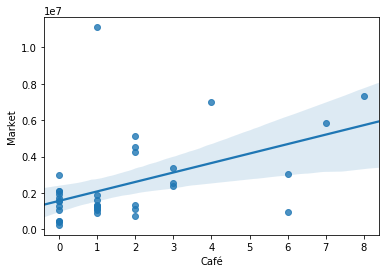

In [31]:

sns.regplot('Café','Market',dd)

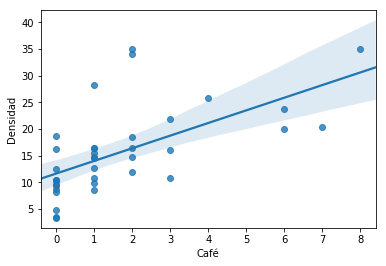

In [32]:
sns.regplot('Café','Densidad',dd)

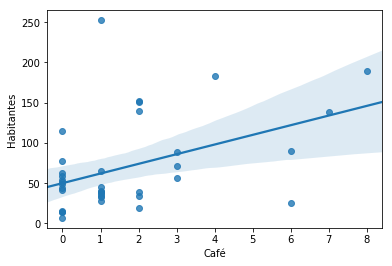

In [33]:

sns.regplot('Café','Habitantes',dd)

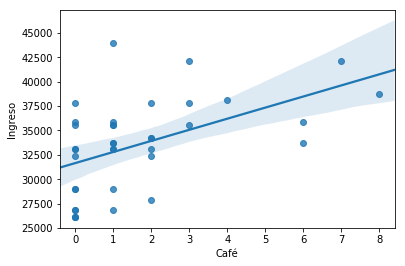

In [34]:

sns.regplot('Café','Ingreso',dd)

In [35]:

# Df subset for clustering
bsas_subs = dd[['Neighborhood','Habitantes','Ingreso','Café']].copy()
bsas_subs.head(2)

,Neighborhood,Habitantes,Ingreso,Café
0,ALMAGRO,139.262,32390.0,2
1,BOEDO,48.520,32390.0,0


In [36]:
columns=['Habitantes','Ingreso','Café']

Cluster Neighborhoods
Run k-means to cluster the neighborhood into 3 clusters.

In [37]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
mm_scaler.fit_transform(bsas_subs[columns])

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.5391583 , 0.3531154 , 0.25      ],
       [0.16925385, 0.3531154 , 0.        ],
       [0.59189114, 0.0992456 , 0.25      ],
       [0.28728313, 0.04459346, 0.        ],
       [0.22940582, 0.04459346, 0.        ],
       [0.13813022, 0.04459346, 0.125     ],
       [0.53785384, 0.89796032, 0.875     ],
       [0.20381392, 0.89796032, 0.375     ],
       [0.71906796, 0.67320481, 0.5       ],
       [0.08332246, 0.42497904, 0.125     ],
       [0.13237428, 0.42497904, 0.125     ],
       [0.33776986, 0.42497904, 0.75      ],
       [0.04963883, 0.65761386, 0.25      ],
       [0.18231069, 0.65761386, 0.        ],
       [0.33573572, 0.65761386, 0.375     ],
       [0.58490412, 0.45437273, 0.25      ],
       [0.13237428, 0.45437273, 0.25      ],
       [0.13237428, 0.39066778, 0.125     ],
       [0.11244456, 0.39066778, 0.25      ],
       [0.0292607 , 0.39066778, 0.        ],
       [0.10622391, 0.39066778, 0.125     ],
       [0.02966834, 0.39066778, 0.        ],
       [0.

In [38]:
df_scaled = pd.DataFrame(mm_scaler.fit_transform(bsas_subs[columns]))
df_scaled.columns = columns

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


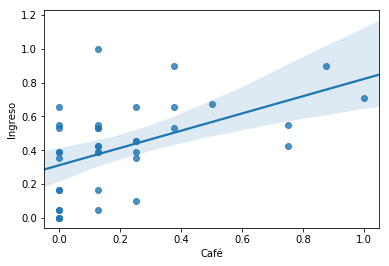

In [39]:
sns.regplot('Café','Ingreso',df_scaled)

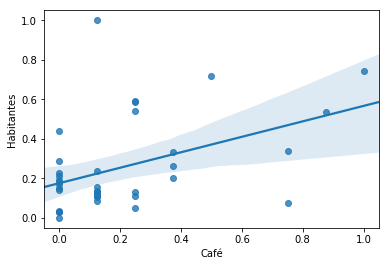

In [40]:

sns.regplot('Café','Habitantes',df_scaled)

In [41]:
# set number of clusters
kclusters = 3

#Sin Scale
# kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bsas_subs.drop('Neighborhood',1))


# # run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_scaled)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 0, 0, 0, 0, 2, 1, 2, 1], dtype=int32)

In [42]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [43]:

# Review df's
dd.head(3)

,Barrio,Superficie,Habitantes,Densidad,centroid_lon,centroid_lat,comuna,Ingreso,Neighborhood,Wine Shop,...,Toy / Game Store,Track,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Vietnamese Restaurant,Whisky Bar
0,ALMAGRO,4.1,139.262,33.960,-58.421745,-34.609227,5,32390.0,ALMAGRO,0,...,0,0,0,0,0,0,0,0,0,0
1,BOEDO,2.6,48.520,18.662,-58.418840,-34.629960,5,32390.0,BOEDO,0,...,0,0,0,0,0,0,0,0,0,0
2,BALVANERA,4.4,152.198,34.950,-58.403062,-34.609099,3,27847.0,BALVANERA,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:

neighborhoods_venues_sorted.head(3)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,ALMAGRO,Argentinian Restaurant,Pizza Place,Ice Cream Shop,Bar,Bakery,Café,Cheese Shop,Italian Restaurant,Indie Theater,Mexican Restaurant
1,1,BALVANERA,Fast Food Restaurant,Café,Electronics Store,BBQ Joint,Food,Metro Station,Gas Station,Bus Stop,Gym / Fitness Center,Hotel
2,0,BARRACAS,Grocery Store,Speakeasy,Farmers Market,Whisky Bar,Food & Drink Shop,Food,Fondue Restaurant,Flea Market,Fast Food Restaurant,Falafel Restaurant


In [45]:
df_merged = dd.merge(neighborhoods_venues_sorted.set_index('Neighborhood'), left_on='Barrio', right_on='Neighborhood')

df_merged.head()

,Barrio,Superficie,Habitantes,Densidad,centroid_lon,centroid_lat,comuna,Ingreso,Neighborhood,Wine Shop,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALMAGRO,4.1,139.262,33.960,-58.421745,-34.609227,5,32390.0,ALMAGRO,0,...,Argentinian Restaurant,Pizza Place,Ice Cream Shop,Bar,Bakery,Café,Cheese Shop,Italian Restaurant,Indie Theater,Mexican Restaurant
1,BOEDO,2.6,48.520,18.662,-58.418840,-34.629960,5,32390.0,BOEDO,0,...,Argentinian Restaurant,Soccer Field,Breakfast Spot,Ice Cream Shop,BBQ Joint,Event Space,Bus Stop,Pizza Place,Intersection,Hardware Store
2,BALVANERA,4.4,152.198,34.950,-58.403062,-34.609099,3,27847.0,BALVANERA,0,...,Fast Food Restaurant,Café,Electronics Store,BBQ Joint,Food,Metro Station,Gas Station,Bus Stop,Gym / Fitness Center,Hotel
3,BARRACAS,7.6,77.474,10.194,-58.384272,-34.646403,4,26869.0,BARRACAS,0,...,Grocery Store,Speakeasy,Farmers Market,Whisky Bar,Food & Drink Shop,Food,Fondue Restaurant,Flea Market,Fast Food Restaurant,Falafel Restaurant
4,NUEVA POMPEYA,6.2,63.276,10.373,-58.418882,-34.650515,4,26869.0,NUEVA POMPEYA,0,...,Pizza Place,Electronics Store,Department Store,Train Station,Bus Stop,Fast Food Restaurant,Grocery Store,Plaza,Eastern European Restaurant,Diner


In [47]:
df_scaled.head(3)

,Habitantes,Ingreso,Café
0,0.539158,0.353115,0.25
1,0.169254,0.353115,0.00
2,0.591891,0.099246,0.25


In [48]:
clust_an = df_merged[['Neighborhood','Habitantes','Densidad','Market','Café', 'Cluster Labels']]

In [49]:
#Scaled
clust_an = df_scaled.merge(df_merged[['Neighborhood','Cluster Labels']],left_index=True, right_index=True)

In [50]:

clust_an.head(3)

,Habitantes,Ingreso,Café,Neighborhood,Cluster Labels
0,0.539158,0.353115,0.25,ALMAGRO,1
1,0.169254,0.353115,0.00,BOEDO,0
2,0.591891,0.099246,0.25,BALVANERA,1


In [51]:
# Compare each cluster 
clust_an.groupby('Cluster Labels').mean()

,Habitantes,Ingreso,Café
Cluster Labels,,,
0,0.271273,0.490780,0.275000
1,0.284085,0.363629,0.190476
2,0.141285,0.489485,0.166667



From the table we can infer that:

Cluster 0 High Income, High Café number.
Cluster 1 Medium to High Income, Lower Café number.
Cluster 2 Lower Income.


From the table we can infer that:

Cluster 0 High Income, High Café number.
Cluster 1 Medium to High Income, Lower Café number.
Cluster 2 Lower Income.

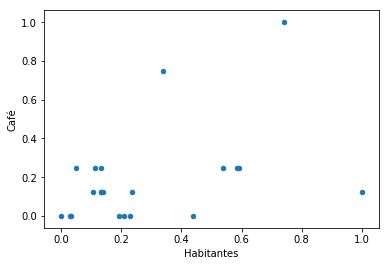

In [53]:
# Check Population/Café for Cluster 1
clust_an.loc[clust_an['Cluster Labels'] == 1].plot.scatter('Habitantes','Café')

In [54]:
# Select the top 2 candidates from the cluster, ordered by Income
clust_an.loc[clust_an['Cluster Labels'] == 1].sort_values('Ingreso',ascending=False).head(2)

,Habitantes,Ingreso,Café,Neighborhood,Cluster Labels
25,1.000000,1.00000,0.125,PALERMO,1
29,0.741016,0.71059,1.000,RECOLETA,1


In [55]:
selected_cluster = 1

candidatos =   df_merged.loc[df_merged['Cluster Labels'] == selected_cluster]
# create map
map_selected = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(candidatos['centroid_lat'], candidatos['centroid_lon'], candidatos['Barrio'], candidatos['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_selected)
       
map_selected